<a href="https://colab.research.google.com/github/pragneshrana/DeepLearning/blob/master/DeepCNN/LargeCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Dataset, transforms, and visualisation

In [10]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),  #resizing image
    transforms.ToTensor(),  #converting to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), #(mean,SD)(3 channel RGB)
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [11]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                        download=True, 
                                        transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
num_classes = 10

In [13]:
batch_size = 4

In [15]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [20]:
dataiter = iter(trainloader)
images, labels = dataiter.next() #for one batch

print(images.shape)

print(images[1].shape)
print(labels[1].item())

# 4 images in batch 
# 3 channels in images
# 224,224 image size

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
4


In [28]:
def imshow(img, title) :
    npimg = img.numpy() / 2 + 0.5 ##unnormalizing ( add mean , multiply by SD)
    plt.figure(figsize=(batch_size, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [29]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

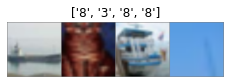

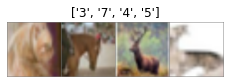

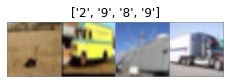

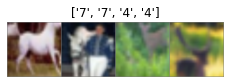

In [30]:
for i in range(4):
    show_batch_images(trainloader)

## Creating VGG-16

https://pytorch.org/docs/stable/torchvision/models.html

In [31]:
from torchvision import models

In [32]:
vgg = models.vgg16_bn()

In [33]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [34]:
print(vgg.features[0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
print(vgg.classifier[6])

# Restructuring VGG classifier

In [35]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1] #taking all classifier except last
mod_classifier.extend([nn.Linear(final_in_features, num_classes)]) #appending new classifier
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [36]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

**Observe last layer modified**

### Train CIFAR10

In [37]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [40]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [41]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

Iteration: 0/3125, Loss: 2.61
Iteration: 100/3125, Loss: 2.64
Iteration: 200/3125, Loss: 2.37
Iteration: 300/3125, Loss: 2.38
Iteration: 400/3125, Loss: 2.29
Iteration: 500/3125, Loss: 2.38
Iteration: 600/3125, Loss: 2.35
Iteration: 700/3125, Loss: 2.28
Iteration: 800/3125, Loss: 2.36
Iteration: 900/3125, Loss: 2.32
Iteration: 1000/3125, Loss: 2.36
Iteration: 1100/3125, Loss: 2.31
Iteration: 1200/3125, Loss: 2.29
Iteration: 1300/3125, Loss: 2.22
Iteration: 1400/3125, Loss: 2.16
Iteration: 1500/3125, Loss: 2.21
Iteration: 1600/3125, Loss: 1.98
Iteration: 1700/3125, Loss: 2.53
Iteration: 1800/3125, Loss: 2.27
Iteration: 1900/3125, Loss: 2.14
Iteration: 2000/3125, Loss: 2.19
Iteration: 2100/3125, Loss: 1.92
Iteration: 2200/3125, Loss: 2.12
Iteration: 2300/3125, Loss: 1.96
Iteration: 2400/3125, Loss: 2.26
Iteration: 2500/3125, Loss: 2.00
Iteration: 2600/3125, Loss: 2.27
Iteration: 2700/3125, Loss: 1.79
Iteration: 2800/3125, Loss: 1.99
Iteration: 2900/3125, Loss: 2.17
Iteration: 3000/3125, 

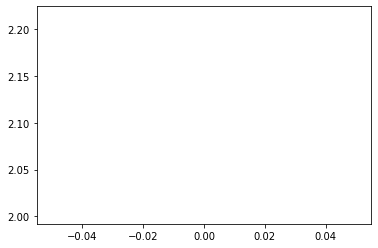

In [42]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, vgg), evaluation(trainloader, vgg)))
    
plt.plot(loss_epoch_arr)
plt.show()

**Took lot of time around 20 min**

### Freeze layers of Convolutional Operations

**Downloading trained model parameters**

In [43]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [44]:
vgg = models.vgg16_bn(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


In [45]:
# Setting all the graient change to false
for param in vgg.parameters():
    param.requires_grad = False

In [46]:
#unfreezing last layer as in case of imagenet output was 1000 where here we need 10
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [47]:
#cheking number of parameters requires update
for param in vgg.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 4096])
torch.Size([10])


In [48]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

Iteration: 0/3125, Loss: 2.44
Iteration: 100/3125, Loss: 2.00
Iteration: 200/3125, Loss: 1.82
Iteration: 300/3125, Loss: 1.82
Iteration: 400/3125, Loss: 0.87
Iteration: 500/3125, Loss: 2.27
Iteration: 600/3125, Loss: 2.50
Iteration: 700/3125, Loss: 2.36
Iteration: 800/3125, Loss: 1.22
Iteration: 900/3125, Loss: 1.94
Iteration: 1000/3125, Loss: 2.00
Iteration: 1100/3125, Loss: 1.37
Iteration: 1200/3125, Loss: 2.31
Iteration: 1300/3125, Loss: 1.98
Iteration: 1400/3125, Loss: 2.01
Iteration: 1500/3125, Loss: 2.20
Iteration: 1600/3125, Loss: 1.66
Iteration: 1700/3125, Loss: 2.61
Iteration: 1800/3125, Loss: 2.52
Iteration: 1900/3125, Loss: 1.69
Iteration: 2000/3125, Loss: 1.92
Iteration: 2100/3125, Loss: 2.46
Iteration: 2200/3125, Loss: 2.54
Iteration: 2300/3125, Loss: 2.11
Iteration: 2400/3125, Loss: 2.00
Iteration: 2500/3125, Loss: 2.29
Iteration: 2600/3125, Loss: 2.05
Iteration: 2700/3125, Loss: 2.78
Iteration: 2800/3125, Loss: 2.44
Iteration: 2900/3125, Loss: 2.49
Iteration: 3000/3125, 

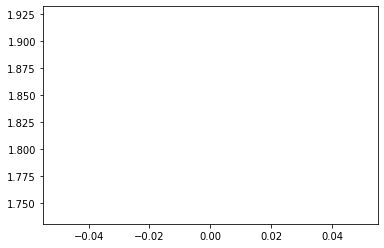

In [49]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, vgg), evaluation(trainloader, vgg)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

**loss is high here but intermediate loss is low so checkpointing at such points can help**

**For Iteration-0 way to calculate random loss is - ln(number of output) = ln(10)  = 2.3XXX** 

### With model copies

In [50]:
import copy

In [51]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(vgg.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())

Min loss 1.26
Iteration: 0/3125, Loss: 1.26
Min loss 1.24
Min loss 0.97
Min loss 0.50
Iteration: 100/3125, Loss: 1.82
Iteration: 200/3125, Loss: 2.73
Iteration: 300/3125, Loss: 1.56
Iteration: 400/3125, Loss: 1.26
Iteration: 500/3125, Loss: 1.90
Min loss 0.47
Iteration: 600/3125, Loss: 2.57
Iteration: 700/3125, Loss: 1.97
Iteration: 800/3125, Loss: 1.46
Iteration: 900/3125, Loss: 2.72
Iteration: 1000/3125, Loss: 1.95
Iteration: 1100/3125, Loss: 1.76
Iteration: 1200/3125, Loss: 2.05
Iteration: 1300/3125, Loss: 1.87
Iteration: 1400/3125, Loss: 2.10
Iteration: 1500/3125, Loss: 2.62
Iteration: 1600/3125, Loss: 1.46
Iteration: 1700/3125, Loss: 1.34
Iteration: 1800/3125, Loss: 1.25
Iteration: 1900/3125, Loss: 2.50
Iteration: 2000/3125, Loss: 1.80
Iteration: 2100/3125, Loss: 2.84
Iteration: 2200/3125, Loss: 1.31
Iteration: 2300/3125, Loss: 3.58
Iteration: 2400/3125, Loss: 2.14
Iteration: 2500/3125, Loss: 2.80
Iteration: 2600/3125, Loss: 2.54
Iteration: 2700/3125, Loss: 2.03
Iteration: 2800/31

In [52]:
vgg.load_state_dict(best_model)
print(evaluation(trainloader, vgg), evaluation(testloader, vgg))

46.44 45.85


## ResNet Model

https://pytorch.org/docs/master/_modules/torchvision/models/resnet.html

In [53]:
resnet = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [54]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [55]:
for param in resnet.parameters():
    param.requires_grad = False

In [56]:
in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features, num_classes)

In [57]:
for param in resnet.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 512])
torch.Size([10])


In [58]:
resnet = resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(resnet.parameters(), lr=0.01)

Min loss 2.58
Iteration: 0/3125, Loss: 2.58
Min loss 2.50
Min loss 2.08
Min loss 2.07
Min loss 2.01
Min loss 1.99
Min loss 1.95
Min loss 1.85
Min loss 1.84
Min loss 1.84
Min loss 1.80
Min loss 1.76
Min loss 1.71
Iteration: 100/3125, Loss: 1.77
Min loss 1.64
Min loss 1.57
Min loss 1.51
Min loss 1.51
Min loss 1.43
Min loss 1.43
Min loss 1.35
Min loss 1.29
Iteration: 200/3125, Loss: 2.04
Min loss 1.27
Min loss 1.20
Iteration: 300/3125, Loss: 1.94
Min loss 1.13
Min loss 1.10
Iteration: 400/3125, Loss: 1.72
Min loss 1.09
Min loss 0.91
Iteration: 500/3125, Loss: 1.40
Min loss 0.78
Iteration: 600/3125, Loss: 1.58
Iteration: 700/3125, Loss: 1.48
Min loss 0.72
Iteration: 800/3125, Loss: 1.54
Iteration: 900/3125, Loss: 1.30
Iteration: 1000/3125, Loss: 0.99
Iteration: 1100/3125, Loss: 1.63
Iteration: 1200/3125, Loss: 1.48
Iteration: 1300/3125, Loss: 1.46
Iteration: 1400/3125, Loss: 1.44
Iteration: 1500/3125, Loss: 1.54
Min loss 0.69
Iteration: 1600/3125, Loss: 1.94
Min loss 0.67
Iteration: 1700/3

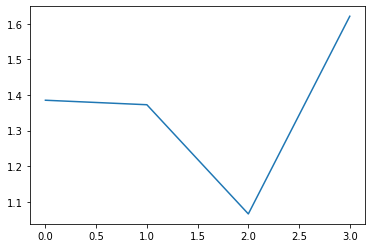

In [59]:
loss_epoch_arr = []
max_epochs = 4

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = resnet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(resnet.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, resnet), evaluation(trainloader, resnet)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

In [60]:
resnet.load_state_dict(best_model)
print(evaluation(trainloader, resnet), evaluation(testloader, resnet))

57.428 57.79


## Inception Model

https://pytorch.org/docs/master/_modules/torchvision/models/inception.html

In [61]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


In [62]:
print(inception)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [63]:
for param in inception.parameters():
    param.requires_grad = False

In [64]:
aux_in_features = inception.AuxLogits.fc.in_features
inception.AuxLogits.fc = nn.Linear(aux_in_features, num_classes)

In [65]:
for param in inception.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 768])
torch.Size([10])


In [66]:
in_features = inception.fc.in_features
inception.fc = nn.Linear(in_features, num_classes)

In [67]:
for param in inception.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 768])
torch.Size([10])
torch.Size([10, 2048])
torch.Size([10])


In [68]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(299), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(299), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [69]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                        download=True, 
                                        transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [70]:
batch_size=16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [71]:
inception = inception.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(inception.parameters(), lr=0.01)

In [72]:
def evaluation_inception(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs, aux_outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

Min loss 3.12
Iteration: 0/3125, Loss: 3.12
Min loss 2.94
Min loss 2.88
Min loss 2.83
Min loss 2.76
Min loss 2.69
Min loss 2.64
Min loss 2.60
Min loss 2.49
Iteration: 100/3125, Loss: 2.64
Min loss 2.47
Min loss 2.33
Min loss 2.31
Min loss 2.25
Iteration: 200/3125, Loss: 2.47
Min loss 2.16
Min loss 2.05
Min loss 2.03
Iteration: 300/3125, Loss: 2.20
Min loss 1.98
Min loss 1.90
Iteration: 400/3125, Loss: 1.90
Min loss 1.50
Iteration: 500/3125, Loss: 2.07
Iteration: 600/3125, Loss: 1.74
Iteration: 700/3125, Loss: 1.98
Iteration: 800/3125, Loss: 2.44
Iteration: 900/3125, Loss: 2.24
Iteration: 1000/3125, Loss: 2.07
Iteration: 1100/3125, Loss: 2.17
Min loss 1.45
Min loss 1.43
Min loss 1.38
Iteration: 1200/3125, Loss: 1.80
Iteration: 1300/3125, Loss: 2.07
Min loss 1.32
Iteration: 1400/3125, Loss: 2.15
Min loss 1.27
Iteration: 1500/3125, Loss: 1.86
Iteration: 1600/3125, Loss: 1.99
Iteration: 1700/3125, Loss: 2.05
Min loss 1.21
Iteration: 1800/3125, Loss: 1.94
Iteration: 1900/3125, Loss: 1.65
Mi

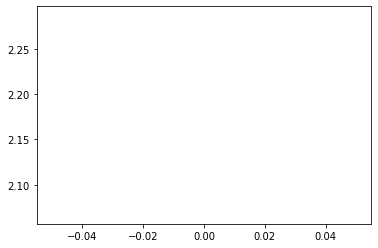

In [73]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs, aux_outputs = inception(inputs)
        loss = loss_fn(outputs, labels) + 0.3 * loss_fn(aux_outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(inception.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation_inception(testloader, inception), 
        evaluation_inception(trainloader, inception)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

In [74]:
inception.load_state_dict(best_model)
print(evaluation_inception(trainloader, inception), evaluation_inception(testloader, inception))

47.436 46.69
